# Calculating lengths in curved spaces using SymPy’s symbolic mathematics, Python and Matplotlib

- Written by: [B.L. de Vries](https://www.linkedin.com/in/bldevries/)
- Date: 23 Jan 2023
- Also found on [medium](https://medium.com/@bldevries/calculating-lengths-in-curved-spaces-using-sympys-symbolic-mathematics-python-and-matplotlib-7c18da99fd7b)

In this blog we will start our journey in symbolic mathematics in Python using SymPy, 3D plotting in matplotlib and General Relativity. The theory of General Relativity describes how energy curves space and how objects move through curved space. Differential Geometry is heavily used in General Relativity and is, roughly speaking, all about studying lengths and differentials in curved spaces. A great curved space to start with is a sphere. In this blog we will use the two-dimensional surface of a sphere and calculate the distance between two points on this sphere. This will help us develop insight and learn mathematical machinery to continue towards calculations in curved four-dimensional space-times :)

In [1]:
from IPython.display import Image
Image(url= "BLOG_1_files/fig1.jpg", width=700, height=700)

We will do our calculations using SymPy (https://www.sympy.org/), which is a way to do symbolic mathematics in Python. Maybe you are familiar with expensive software like Mathematica? SymPy offers similar capabilities but free and completely integrated into Python. In this blog we will learn how to create symbols, create expressions, vectors and matrices, differentiate these expressions and eventually convert symbolic expressions into numerical values.|

This blog will by quite math heavy and there may be some prerequisites to understanding certain parts. It will be useful if you have some background in linear algebra (vectors, matrices, basis and coordinate transformations). We will also use parametrized curves, but you can probably follow with some calculus experience. I also briefly touch on tensors, but all calculations are done using matrices.

### What are we going to calculate

Before we dive into our calculations lets see what we are going to calculate. In the figure below you see four differently colored curves drawn over a sphere. The sphere of unit radius is shown as a grey colored grid. In this blog we will calculate the lengths of these curves. For some curves, knowing the circumference of a sphere, it can be done easily (like for curve $\gamma_1$ and $\gamma_2$). Using some geometry, $\gamma_3$ can also readily be calculated. But we want to do it for any curve on a sphere, for example $\gamma_4$. Alright, lets get to it.

In [3]:
Image(url= "BLOG_1_files/fig2_curves.png", width=700, height=700)

### Loading the necessary Python packages

First, we need to load SymPy for our symbolic calculations. We also need CoordSys3D from SymPy to work with (basis) vectors. Also, we load Numpy and Matplotlib. For three dimensional plots we use the Axes3D from mpl_toolkits. To get our equations looking nice in jupyter notebooks we can use IPython.display. We also need to initialize SymPy’s printing using sp.init_printing().

In [19]:
import sympy as sp
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

sp.init_printing()

### Writing symbolic coordinate expressions

Our goal is to calculate the length of curves on a sphere. Such curves can naturally be described using spherical coordinates. We use 𝑟 as the distance from the origin of our coordinate system. $\theta$ is the angle from the z-axes and $\phi$ is the angle from the x-axes towards the y-axes (right-handed rotation around the z-axes). In some cases, for example when plotting, we want to convert our spherical coordinates to cartesian coordinates. So, let’s set up the expressions that relate spherical to cartesian coordinates.

For SymPy to calculate with expressions symbolically we need to create our variables as symbols. We want to write the cartesian coordinates x, y and z as functions of the spherical coordinates 𝑟, $\theta$ and $\phi$. So, we need to define the spherical coordinates as symbols.

In [2]:
#x, y, z = sp.symbols('x y z')
r, th, ph = sp.symbols('r \\theta \\phi')

Now we can write the cartesian coordinates as a function of the spherical coordinates

In [3]:
x = r * sp.cos(ph) * sp.sin(th)
y = r * sp.sin(ph) * sp.sin(th)
z = r * sp.cos(th)

And now you can see that SymPy keeps these functions symnbolic and we can print them pretty :)

In [4]:
display(x, y, z)

### Curves on a sphere

Mathematicians will cringe reading the next explanation, but full mathematical rigor is out of the scope of this introduction so I will keep it simple. A two-dimension sphere is a surface that can be described by two numbers (here we will use $\theta$ and $\phi$). We can make a mapping of these two numbers to three numbers. The three numbers here are the coordinates used for the 3-dimensional space in which the surface is embedded. For our sphere these three numbers can be the cartesian coordinates 𝑥, 𝑦 and 𝑧 or the spherical coordinates r, $\theta$ and $\phi$. So, all points of a sphere of radius 𝑟=1 are given by a function (or a mapping):

$$\sigma(\theta, \phi) = (1, \thinspace \theta, \thinspace \phi \thinspace)$$

Or you can write the points of the sphere in three dimensions using the cartesian coordinates $x$, $y$ and $z$:

$$\sigma_{xyz}(\theta, \phi) = (\thinspace \cos(\phi) \sin(\theta), \thinspace \sin(\phi) \sin(\theta), \thinspace \cos(\theta) \thinspace)$$

In a similar way a curve on the sphere can be described by only one parameters (a line is a 1-dimensional space). So a curve in three dimensions can be seen as a mapping from one number to three:

$$\gamma(\lambda) = (1, \thinspace \theta(\lambda), \thinspace \phi(\lambda)\thinspace )$$

Here $\gamma$ gives all the points on the curve and $\theta(\lambda)$ and $\phi(\lambda)$ are functions that give the $\theta$ and $\phi$ coordinates of those points. $\lambda$ is the parameter that covers the curve. A way to think of it is that $\gamma$ is the location of a particle while $\lambda$ is the time coordinate describing the movement of the particle over the curve.

Ok let’s write down the description of a curve in Python using SymPy. To work with objects in SymPy that have components, like vectors, we can use coordinate systems. We can define a coordinate system named ’N’ in SymPy like this:

In [5]:
N = CoordSys3D('N')

The curves we will study are parametrized by $\lambda$, and as before we will create a symbol for this parameter:

In [6]:
lamb = sp.symbols('\lambda') 

In this blog we will study four examples of curves, named $\gamma_1$, $\gamma_2$, $\gamma_3$ and $\gamma_4$. Using our SymPy coordinate system N we write the components of the curve as a vector object using the N.i, N.j and N.k objects which stand for the basis vectors of r, $\theta$ and $\phi$ components respectively:

In [23]:
gam1 = N.i + 1/2*sp.pi* N.j + lamb*N.k # A curve over the equator
gam2 = N.i + lamb * N.j + 0 * N.k # A curve over a line of longitude
gam3 = N.i + 1/4*sp.pi* N.j + lamb*N.k # A curve at a lattitude above the equator
gam4 = N.i + 1/sp.sqrt(2)*lamb * N.j + 1/sp.sqrt(2)*lamb*N.k # A combination
display(gam1)
display(gam2)
display(gam3)
display(gam4)

You can see that SymPy keeps the curves symbolic.

### Lets get numerical

We like to work mostly symbolic so that we can see the mathematical form of all the expressions we derive. But we also want to calculate numbers, for example for plotting the curves we defined. SymPy has two ways to calculate numerical values from symbolic expressions. One slow, but easy, way is to use the functions subs() and evalf() (https://docs.sympy.org/latest/modules/numeric-computation.html). For example, if you want to calculate the x coordinate given some $r$, $\theta$, and $\phi$ values, you first substitute those values into the expression:

In [24]:
x.subs(r, 1).subs(th, 1).subs(ph, 2)

And then you can evaluate the expression to a numerical value:

In [9]:
x.subs(r, 1).subs(th, 1).subs(ph, 2).evalf()

Another, computational more efficient way to calculate numerical values is by converting an expression into a Python function (see https://docs.sympy.org/latest/modules/utilities/lambdify.html). For example we want to plot a sphere using the symbolic expressions $x(r, \theta, \phi)$, $y(r, \theta, \phi)$ and $z(r, \theta, \phi)$ that we defined above. Then we can convert those expressions to Python functions using the *lambdify()* function:

In [10]:
func_x = sp.lambdify([r, th, ph], x, "numpy")
func_y = sp.lambdify([r, th, ph], y, "numpy")
func_z = sp.lambdify([r, th, ph], z, "numpy")

Now we can get numerical values using those functions:

In [11]:
func_x(1, 1, 2)

The subs and evalf functions are useful for a quick calculation or check for a few numbers. If you want to calculate things for many values, you can better use the lambdify fuction.

### Plotting our curves

To get an idea of what our curves look like we would like to plot them. Luckily *matplotlib* and the *mpl_toolkits* have the functionality to make 3D plots. But those functions need numerical value, so we need to convert the expressions for our curves to numerical values. For this we need to separate the $r$, $\theta$ and $\phi$ component from our curves. And then we need to calculate the x, y and z values using the *func_x*, *func_y* and *func_z* functions. All these operations have been bundled together in the function *getXYZFromCurve*:

In [60]:
def getXYZFromCurve(gam, lamd_value):
    
    # We first separate the r, theta and phi coordinates of the curve. 
    # We can do this using the inner product function dot().
    # We need to use vectorize because of this issue in SymPy:
    # https://github.com/sympy/sympy/issues/5642
    r, th, ph = \
            np.vectorize(sp.lambdify([lamb], gam.dot(N.i), "numpy")), \
            np.vectorize(sp.lambdify([lamb], gam.dot(N.j), "numpy")), \
            np.vectorize(sp.lambdify([lamb], gam.dot(N.k), "numpy"))

    # Now we can use our lambdified function to calculate the x, y and z values.
    x = func_x(r(lamd_value), th(lamd_value), ph(lamd_value))
    y = func_y(r(lamd_value), th(lamd_value), ph(lamd_value))
    z = func_z(r(lamd_value), th(lamd_value), ph(lamd_value))
    
    return x,y,z

The last thing before we can plot is that we need to set a start and end value for the parameter $\lambda$:

In [13]:
lamb_start, lamb_end = 0, np.pi

Now we can start making a figure using matplotlib. 

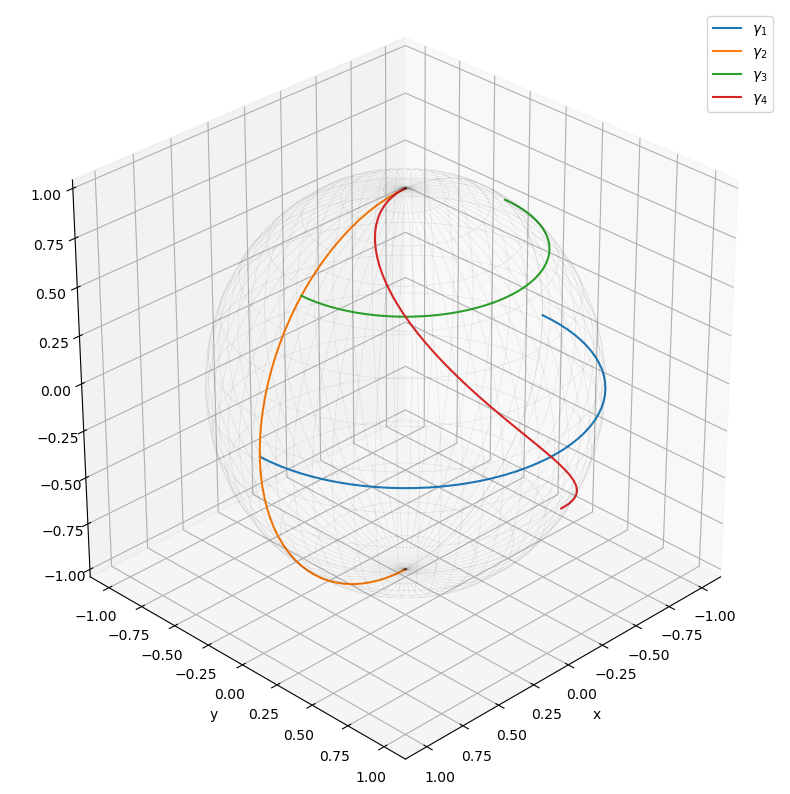

In [61]:
# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=30, azim=45, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
r_w = 1
x_w = func_x(r_w, theta_w, phi_w)
y_w = func_y(r_w, theta_w, phi_w)
z_w = func_z(r_w, theta_w, phi_w)

# We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

# Next we make the lambda values for the curves
lamb_values = np.array(np.linspace(lamb_start, lamb_end, num=50, endpoint=True))

# For all the curves we calculate the cartesian coordinates
# using our getXYZFromCurve function and we plot the curve
x_line, y_line, z_line = getXYZFromCurve(gam1, lamb_values)
ax.plot(x_line, y_line, z_line, label = "$\gamma_1$")

x_line, y_line, z_line = getXYZFromCurve(gam2, lamb_values)
ax.plot(x_line, y_line, z_line, label = "$\gamma_2$")

x_line, y_line, z_line = getXYZFromCurve(gam3, lamb_values)
ax.plot(x_line, y_line, z_line, label = "$\gamma_3$")

x_line, y_line, z_line = getXYZFromCurve(gam4, lamb_values)
ax.plot(x_line, y_line, z_line, label = "$\gamma_4$")

# Lastly we add labels and a legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


## Length of a curve

I have taken the curves $\gamma_1$, $\gamma_2$ and $\gamma_3$ in such a way that we can calculate their length easily, knowing the circumference of a circle ($2\pi r$).

The blue and orange curve in the previous figure ($\gamma_1$ and $\gamma_2$) must have length $l_1 = l_2 = \pi$ since the radius of our sphere is 1 and the length of the curve is half that of a circle.

Curve $\gamma_3$ is half of a circle with radius $R = r \sin(\theta) = \frac{\sqrt{2}}{2}$ since $r=1$ and $\theta=\frac{1}{4} \pi$. So we predict a length of $l_3 = \frac{\sqrt{2}}{2} \pi$.

For curve $\gamma_1$, $\gamma_2$ and $\gamma_3$ calculating the length was easy, but in more general cases like $\gamma_4$ we would need some mathematical machinery. The strategy is that we cut a curve into segments, calculate the length of a segment, and integrate this over the whole curve. We can differentiate $\gamma$ to $\lambda$ to get the length of a piece of the curve ($d\gamma$) when lambda changes a small amount ($d\lambda$). This quantity is called the tangent or the speed of the curve:

$$\vec{U} = \dot{\gamma}(\lambda) = \frac{d\gamma}{d\lambda}$$

You can read this as the change in length of the curve when one changes the parameter $\lambda$ by one unit. In physics $\gamma$ is often the trajectory of a particle and $\lambda$ can be the time and in that case $U$ can be seen as the speed. Now, the length of a curve can be calculated in the following way (please read on because this is only valid in certain cases):

$$l = \int ||\vec{U}(\lambda)|| d\lambda$$

Where 

$||\vec{U}|| = \sqrt{\vec{U}(\lambda) \cdotp \vec{U}(\lambda)}$

is the length of the velocity at point $\lambda$. Or in other words, U is the length of a piece of the curve when $\lambda$ changes by $d\lambda$.

Lets calculate the tangent for our four curves:

In [59]:
U1 = sp.diff(gam1, lamb)
U2 = sp.diff(gam2, lamb)
U3 = sp.diff(gam3, lamb)
U4 = sp.diff(gam4, lamb)
display(U1)
display(U2)
display(U3)
display(U4)

Note that i, j, k stand for the directions of r, $\theta$ and $\phi$. Thus the speed of $U_1$ is 1 in magnitude and points in the $\phi$ direction (east direction). Just as $U_3$. $U_2$ points in the $\theta$ direction (in the longitudinal direction towards the south pole). And $U_4$ has both a $\theta$ and $\phi$ component.

The squared length of the tangent vector U is:

In [41]:
U1.dot(U1), U2.dot(U2), U3.dot(U3), U4.dot(U4)

Now since $\vec{U}$ is constant and has unit length for all our curves, everything seems simple. The length is simply $\lambda_{\mathrm{end}}-\lambda_{\mathrm{start}}$, which is $\pi$ for curve $\gamma_1$ and $\gamma_2$, which is right. But it is also $\pi$ for $\gamma_3$, which is **wrong**! What is going on?

Well, to train our intuition, we can see that the longitude lines (the lines connecting the north and south pole) do not stay at equal distance to each other. If you go from the equator to the north pole the distance between the longitudinal lines ‘shrinks’ all the way to zero. More so, these longitudinal lines start parallel to each other at the equator ($\theta = 90^o$) but the closer you get to the north pole $\theta = 0^o$) the further away the lines become from parallel.

We see this ‘shrinkage’ effect influences the length difference between the curve $\gamma_1$ and $\gamma_3$. They are east-west curves (starting and ending at the same $\phi$ values) but are located at different $\theta$ values ($\theta = 1/2 \pi$ and $1/4 \pi$ respectively). And things go wrong because we are not considering that the space ‘shrinks’ between two longitudinal lines and this shrinkage dependents on the value of $\theta$. Therefor $\gamma_1$ and $\gamma_3$ are different in length.

The ‘shrinkage’, or better called the curvature of space, manifests itself in the basis vectors, something we have ignored until now. We have done our calculation assuming the basis vectors N.i, N.j and N.k are constant and of unit length. This is fine when you are using cartesian coordinates, which have

$$e_x \cdotp e_x = 1, e_y \cdotp e_y = 1,\thinspace  \mathrm{and}\thinspace e_z \cdotp e_z = 1$$


(in code N.i.dot(N.i) = N.k.dot(N.j) = N.k.dot(N.k) = 1), where $e$ stands for a basis vector. This means that for cartesian coordinates the basis vectors are constant and of unit length. It is an orthonormal basis. But we are using spherical coordinates (a type of curvilinear coordinates, https://en.wikipedia.org/wiki/Curvilinear_coordinates), where this is not the case! The spherical basis vectors are orthogonal, but not of unit length and not constant. Let’s see what they look like.

If we write the basis vectors of our spherical coordinates in terms of the cartesian basis vectors, we need to calculate the following basis transformation:
$$e_r = \frac{\partial x}{\partial r} e_x + \frac{\partial y}{\partial r} e_y + \frac{\partial z}{\partial r} e_z$$
$$e_{\theta} = \frac{\partial x}{\partial \theta} e_x + \frac{\partial y}{\partial \theta} e_y + \frac{\partial z}{\partial \theta} e_z$$
$$e_{\phi} = \frac{\partial x}{\partial \phi} e_x + \frac{\partial y}{\partial \phi} e_y + \frac{\partial z}{\partial \phi} e_z$$

Using this basis transformation and SymPy we can write the spherical basis vectors in terms of the cartesian ones:

In [56]:
e_r = x.diff(r) * N.i + y.diff(r) * N.j + z.diff(r) * N.k
e_th = x.diff(th) * N.i + y.diff(th) * N.j + z.diff(th) * N.k
e_ph = x.diff(ph) * N.i + y.diff(ph) * N.j + z.diff(ph) * N.k
display(e_r)
display(e_th)
display(e_ph)

Here you can see SymPy differentiating an expression and give a symbolic answer, which is pretty nice!

Now we calculate the squared length of the spherical basis vectors:

In [43]:
display(e_r.dot(e_r).simplify())
display(e_th.dot(e_th).simplify())
display(e_ph.dot(e_ph).simplify())

We see that the r basis vector is one but the other two for $\theta$ and $\phi$ are not. We see that the $\phi$  basis vector is a function of $\theta$. This is exactly what we saw with curve $\gamma_1$ and $\gamma_3$. Those two curves have a tangent vector that only has a $\phi$ component, but they lie on two different latitudes (different $\theta$ values). Therefor the lengths of their basis vectors are different and if you do not account for this your calculations go wrong!

We now see that we need to expand our definition of an inner product as a measure of length. We need to incorporate the basis vectors in our calculation of length. The inner product we used only makes sense as a measure of length for vectors on an orthonormal basis (for a basis where the basis vectors have unit length). This holds for the cartesian basis vectors, but not for the spherical basis vectors we have.

So how should you calculate the length of a line on a curved surface? This is a complicated issue, but to start building our intuition let me briefly show how to do it without too much explanation. If we properly incorporate the basis vectors in our definition of length, we would write the inner product as:

$$\vec{U} \cdotp \vec{U} = \sum_{\mu, \nu = 0}^{2} g_{\mu \nu} U^{\mu} U^{\nu}$$

Here U with super script $\mu$ are the components of the vector $\vec{U}$, for example the r, $\theta$ and $\phi$ components of $U$ are respectively $U^0$, $U^1$ and $U^2$ in the case of spherical coordinates. The summation indices $\mu$ and $\nu$ thus count over 0, 1 and 2. 

We call $g$ the metric tensor, but at this point I will not go into tensors, just keep with me while I work with tensors as if they are matrices :). The basis vectors are encoded into this metric object. In three dimensions the metric has 3x3=9 components and to keep it familiar to most, it can be imagined as a matrix:


$$
g_{\mathrm{spherical}} = 
\begin{bmatrix}
e_r \cdotp e_r & e_r \cdotp e_{\theta} & e_r \cdotp e_{\phi}\\
e_{\theta} \cdotp e_r & e_{\theta} \cdotp e_{\theta} & e_{\theta} \cdotp e_{\phi}\\
e_{\phi} \cdotp e_r & e_{\phi} \cdotp e_{\theta} & e_{\phi} \cdotp e_{\phi}
\end{bmatrix}=
\begin{bmatrix}
e_r \cdotp e_r & 0 & 0\\
0 & e_{\theta} \cdotp e_{\theta} & 0\\
0 & 0 & e_{\phi} \cdotp e_{\phi}
\end{bmatrix}
$$

The off-diagonal elements of the matrix are zero for spherical coordinates because the basis vectors are orthogonal. Using SymPy and its matrix implementation we can readily calculate the metric:

In [44]:
g = sp.Matrix( [ [e_r.dot(e_r).simplify(), 0, 0], \
            [0, e_th.dot(e_th).simplify(), 0], \
            [0, 0, e_ph.dot(e_ph).simplify()] ])
g

⎡1  0          0       ⎤
⎢                      ⎥
⎢    2                 ⎥
⎢0  r          0       ⎥
⎢                      ⎥
⎢        2    2        ⎥
⎣0  0   r ⋅sin (\theta)⎦

Note that I could calculate the inner product between basis vectors of spherical coordinates because I can write them in terms of the cartesian basis vectors. And the inner product of cartesian vectors can be calculated using our old idea of length. For cartesian coordinates the metric is:

$$
g_{\mathrm{cart}} = 
\begin{bmatrix}
e_x \cdotp e_x & e_x \cdotp e_{y} & e_x \cdotp e_{z}\\
e_{y} \cdotp e_x & e_{y} \cdotp e_{y} & e_{y} \cdotp e_{z}\\
e_{z} \cdotp e_x & e_{z} \cdotp e_{y} & e_{z} \cdotp e_{z}
\end{bmatrix}=
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
$$

And the inner product reduces to:
$$(\vec{U} \cdotp \vec{U})_{\mathrm{cartesian}} = \sum_{\mu, \nu = 0}^{2} g_{\mu \nu} U^{\mu} U^{\nu} = U_x^2 + U_y^2 + U_z^2$$
Which is the inner product we learned in flat space and is nothing more than Pythagoras's theorem.

For the length of our curves in spherical coordinates we can now also calculate inner product:

$$(\vec{U} \cdotp \vec{U})_{\mathrm{spherical}} = \sum_{\mu, \nu = 0}^{2} g_{\mu \nu} U^{\mu} U^{\nu} = g_{rr}(U^r)^2 + g_{\theta \theta}(U^{\theta})^2 + g_{\phi \phi}(U^{\phi})^2 = (U^r)^2 + r^2 (U^{\theta})^2 + r^2 \sin^2(\theta) (U^{\phi})^2$$

We can do the same calculation in matrix form (taking into account how matrices are multiplied) and we would write this as:

$$
\begin{bmatrix}
U^r\\
U^{\theta}\\
U^{\phi}
\end{bmatrix}^T
\begin{bmatrix}
1 & 0 & 0\\
0 & r^2 & 0\\
0 & 0 & r^2 \sin^2(\theta)
\end{bmatrix}
\begin{bmatrix}
U^r\\
U^{\theta}\\
U^{\phi}
\end{bmatrix}
=
\begin{bmatrix}
U^r &
U^{\theta} &
U^{\phi}
\end{bmatrix}
\begin{bmatrix}
U^r\\
r^2 U^{\theta}\\
r^2 \sin^2(\theta) U^{\phi}
\end{bmatrix}
= (U^r)^2 + r^2 (U^{\theta})^2 + r^2 \sin^2(\theta) (U^{\phi})^2
$$

## Length of a curve

The length of a curve can now in general be written as:

$$l = \int_{\lambda_{\mathrm{start}}}^{\lambda_{\mathrm{end}}} \sqrt{ \vec{U}^T g \; \vec{U} } \thinspace  d\lambda$$

We can implement this formula for the length of a curve in the following Python function:

In [48]:
def lengthCurve(gam, g, lamb_start, lamb_end, v=False):
    # Get the spherical components r, th and phi of the curve:
    r_comp = gam.dot(N.i)
    th_comp = gam.dot(N.j)
    ph_comp = gam.dot(N.k)

    # Differentiate gamma to get U
    U = sp.diff(gam, lamb)
    # Put U in matrix form
    U_M = sp.Matrix([U.dot(N.i), U.dot(N.j), U.dot(N.k)])

    # The following needs to be integrated
    l_lamb = sp.sqrt( (U_M.T * g * U_M)[0].subs(r, r_comp).subs(th, th_comp).subs(ph, ph_comp) ).simplify()
    
    # Do the integral
    L = sp.integrate(l_lamb, (lamb, lamb_start, lamb_end))#.simplify()
    
    return L

To start calculating this length for our curses we write the tangent vectors for our curves as matrices in SymPy:

In [64]:
U1_M = sp.Matrix([U1.dot(N.i), U1.dot(N.j), U1.dot(N.k)])
U2_M = sp.Matrix([U2.dot(N.i), U2.dot(N.j), U2.dot(N.k)])
U3_M = sp.Matrix([U3.dot(N.i), U3.dot(N.j), U3.dot(N.k)])
U4_M = sp.Matrix([U4.dot(N.i), U4.dot(N.j), U4.dot(N.k)])
display(U1_M)
display(U2_M)
display(U3_M)
display(U4_M)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

⎡0 ⎤
⎢  ⎥
⎢√2⎥
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎣2 ⎦

Now finally we can calculate the length of our curves proper. 

In [49]:
lengthCurve(gam1, g, 0, sp.pi)

In [50]:
lengthCurve(gam2, g, 0, sp.pi)

As expected the length of the first and second curve is $\pi$

In [51]:
lengthCurve(gam3, g, 0, sp.pi)

Now we also get the correct length for the third curve, yay!

And lastly for the curve we could not easily find an answer:

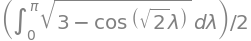

In [52]:
L4 = lengthCurve(gam4, g, 0, sp.pi)
display(L4)
L4.evalf()

But do we know this is correct? Lets do an extra check.

## Extra check if the length of $\gamma_4$ is correct:

I will plot (using the same code as before) the second and fourth curve again. This time though, we set the end point of $\gamma_4$ so that it ends at the south pole.

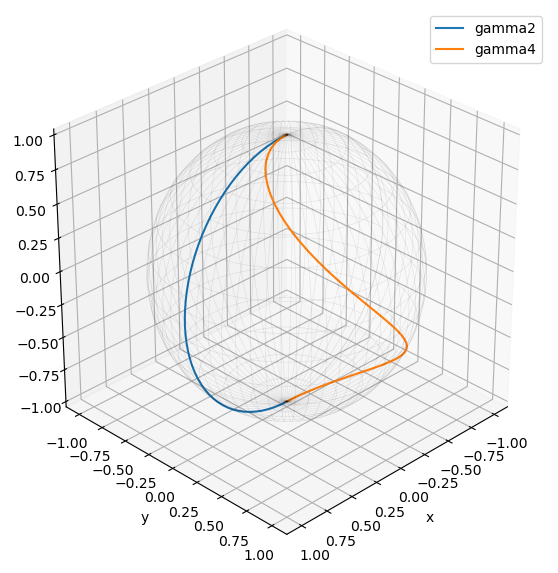

In [66]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.set_aspect("equal") 
ax.view_init(elev=30, azim=45, roll=0)

theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

r_w = 1

x_w = func_x(r_w, theta_w, phi_w)
y_w = func_y(r_w, theta_w, phi_w)
z_w = func_z(r_w, theta_w, phi_w)

ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])#color = "grey")

lamb_values = np.array(np.linspace(0, np.pi, num=50, endpoint=True))
x_line, y_line, z_line = getXYZFromCurve(gam2, lamb_values)
ax.plot(x_line, y_line, z_line, label = "gamma2")


lamb_values = np.array(np.linspace(0, 2*np.pi/np.sqrt(2), num=50, endpoint=True))
x_line, y_line, z_line = getXYZFromCurve(gam4, lamb_values)
ax.plot(x_line, y_line, z_line, label = "gamma4")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()


Because both curves end and the south pole, we can compare the length of the curve $\gamma_2$ to that of $\gamma_4$. In the next blog I will show how we can determine the shortest path between two points in a curved space. This is a very important concept in General Relativity and such a line is called a geodesic. But for now, our intuition probably tells us that $\gamma_2$ (together with all the other longitudinal lines) is the shortest path between the poles. So, our calculations should at least show us that the length $l_2 < l_4$.

The length of $\gamma_4$ with its new end point is now:

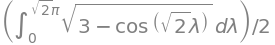

In [54]:
L4 = lengthCurve(gam4, g, lamb_start=0, lamb_end=2*sp.pi/sp.sqrt(2))
display(L4)
L4.evalf()

And we can see that indeed $l_4 > l_2$. Excellent!

In [55]:
L4.evalf() > np.pi

True

## The end

I hope you enjoyed this first voyage into curved spaces and symbolic math with SymPy! In the next blog we will look at how we can calculate the shortest path between two points in a space. These shortest paths are interesting, because there actually is no gravitational force, but particles simply move over the shortest paths through curved space. These shortest paths give the equivalent of straight lines in curved space. But let’s not get ahead of ourselves, see you in the next blog!